<a href="https://colab.research.google.com/github/ShreeKeshavan/Machine_Learning/blob/main/Income_Dataset(UnderSampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AnshulSaini17/Income_evaluation/main/income_evaluation.csv ')
print(df)

       age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   

In [4]:
print(df.shape)#To get no of rows and columns

(32561, 15)


In [5]:
print(df.info()) #To get informations about the data
# No null values in this dataset so no need to view in that prespective
# Those columns which are in object data type we need to do encoding for those columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [6]:
#We are about to predict the income so lets check more deep on the income column
print(df[' income'].value_counts())
#income column divided into two types 

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64


In [7]:
#encoding (replace method)
df[' income'] = df[' income'].replace(' <=50K',0)
df[' income'] = df[' income'].replace(' >50K',1)
print(df[' income'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  income, Length: 32561, dtype: int64>


In [8]:
#THIS DATA SET HAS SPACE IN BEFORE THE COLUMN NAME TO GET RID OF IT WE STRIP THEM ALL
df.columns = [elem.strip() for elem in df.columns]
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [9]:
#Dropping the unnecessary columns
df.drop(['fnlwgt'],axis=1,inplace=True)

In [10]:
#ENCODING
categorical_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
#encoding using loop
le = LabelEncoder()
for col in categorical_columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])

print(df)    

       age  workclass  education  education-num  marital-status  occupation  \
0       39          7          9             13               4           1   
1       50          6          9             13               2           4   
2       38          4         11              9               0           6   
3       53          4          1              7               2           6   
4       28          4          9             13               2          10   
...    ...        ...        ...            ...             ...         ...   
32556   27          4          7             12               2          13   
32557   40          4         11              9               2           7   
32558   58          4         11              9               6           1   
32559   22          4         11              9               4           1   
32560   52          5         11              9               2           4   

       relationship  race  sex  capital-gain  capit

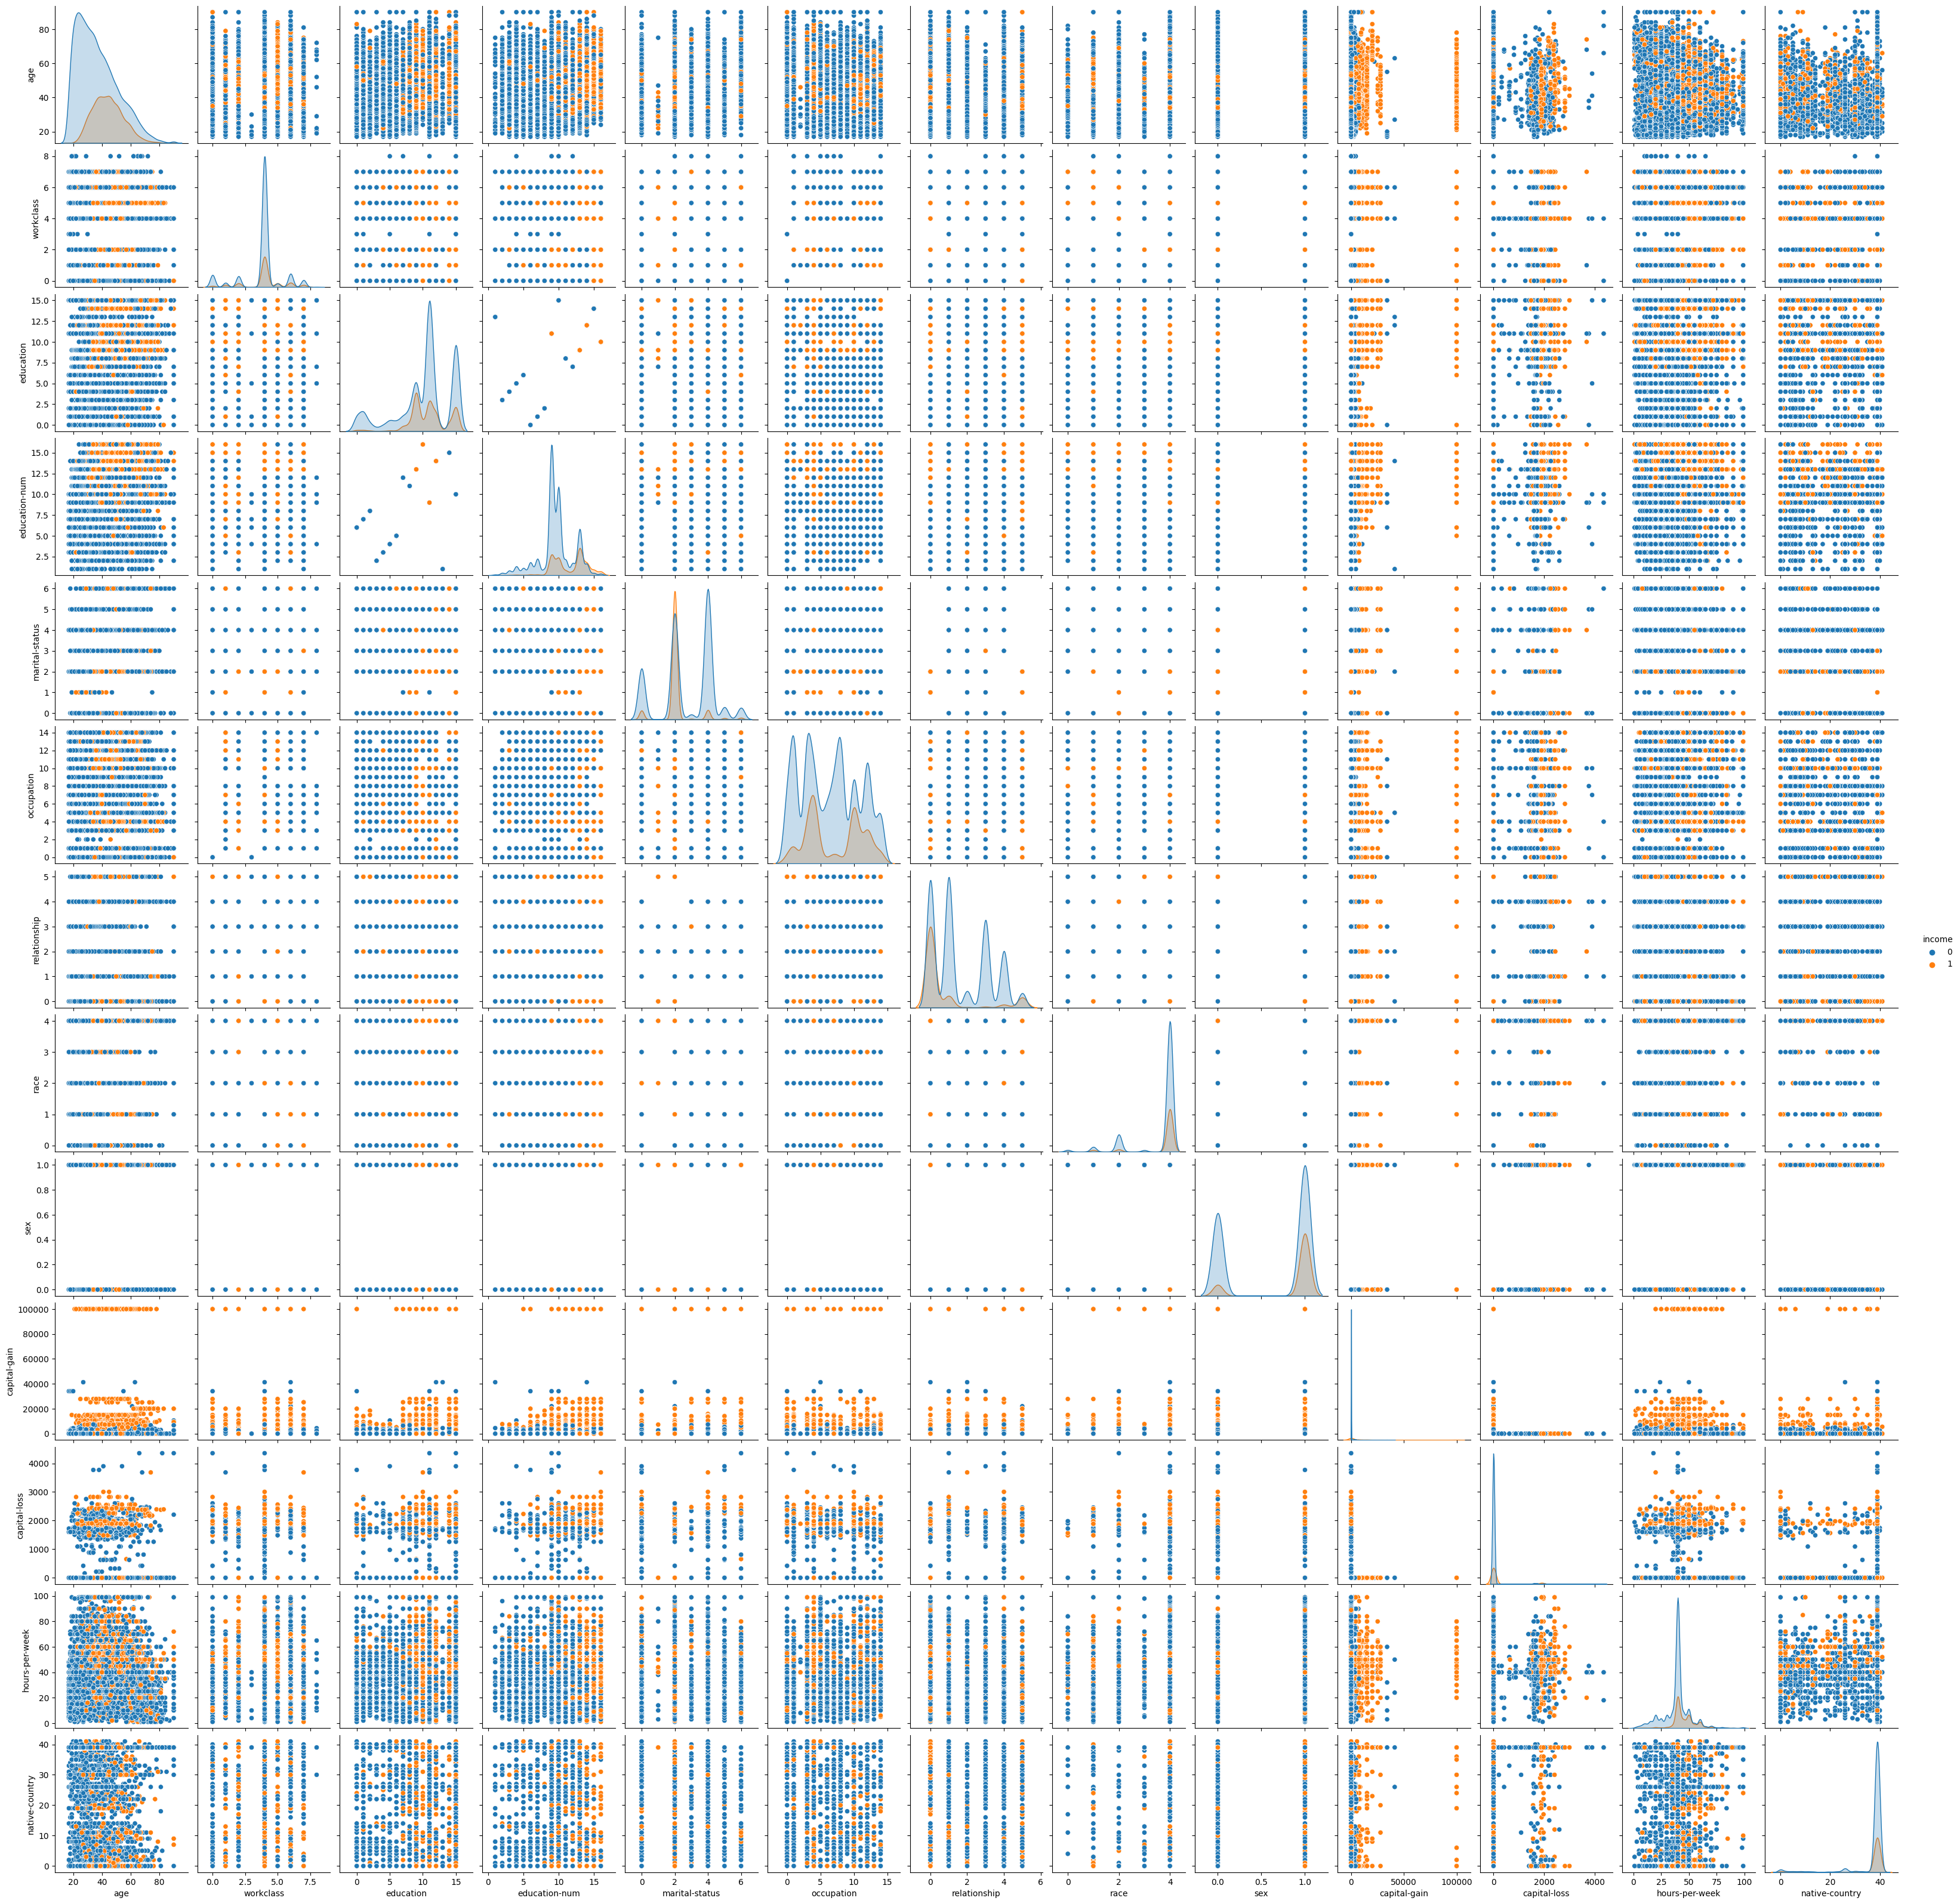

In [ ]:
sns.pairplot(data=df, hue='income')
plt.show()
#pair plot is to check the data is equally distributed or not

In [12]:
#prediction
X = df.drop(['income'],axis=1)
y = df['income']
rus = RandomUnderSampler()
# we neeed to run multiple times
X,y = rus.fit_resample(X,y)
print(y.value_counts())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
prediction = gbc.predict(X_train)

print(accuracy_score(y_train,prediction))

0    7841
1    7841
Name: income, dtype: int64
0.8438553338799307
